#                              LOAN Approval Prediction

# Problem Statement

There a finance company who provides home loans. 
Customers who wants to avail loan, need to first apply and fills some personal details.
After that company manually validates the customer eligibility for loan.

So, Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.

These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)



# Importing Modules

In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
df = pd.read_csv("Loan Prediction Dataset.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the Dataset

In [7]:
# find the null values
pp=df.isnull().sum()

In [8]:
pp

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

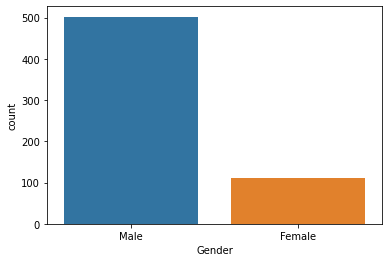

In [11]:
# categorical attributes visualization
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

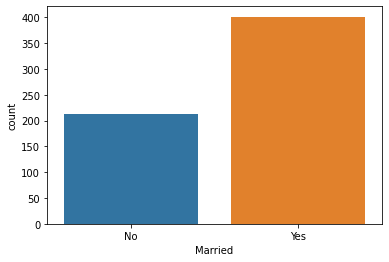

In [12]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

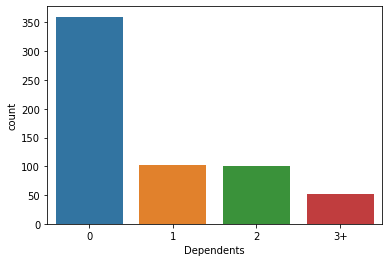

In [13]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

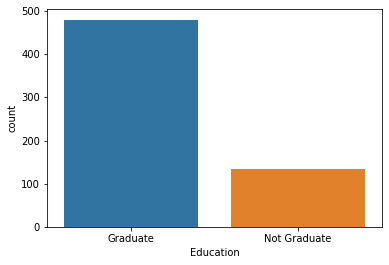

In [14]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

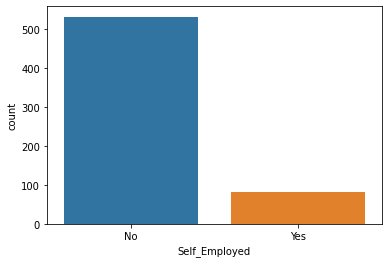

In [15]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

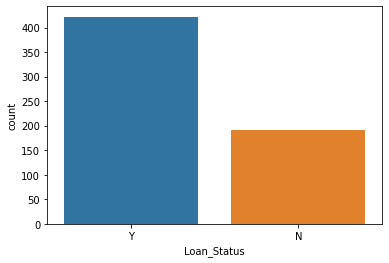

In [16]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

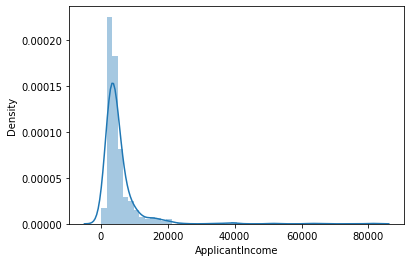

In [17]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

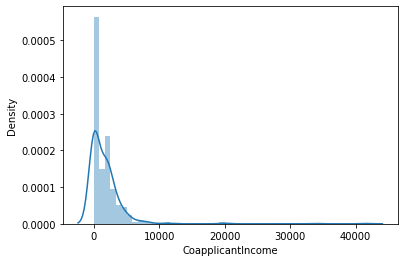

In [18]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

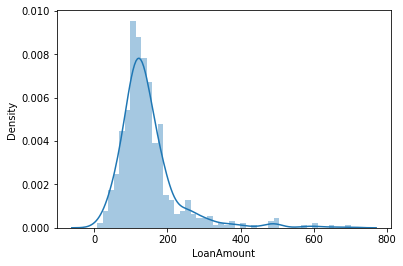

In [19]:
sns.distplot(df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

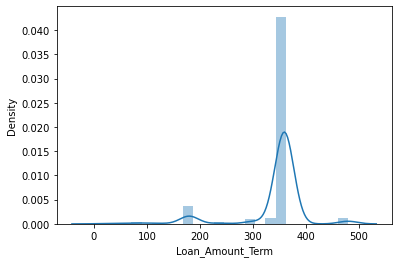

In [20]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

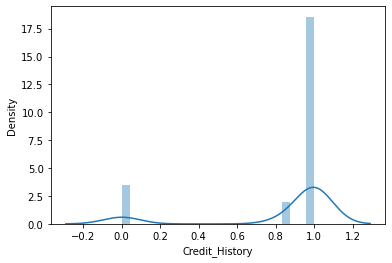

In [21]:
sns.distplot(df['Credit_History'])

#  Outliers Treatment
Log Transformation

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

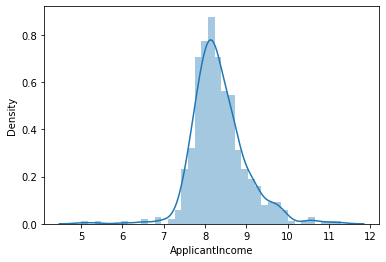

In [22]:
# apply log transformation to the attribute
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

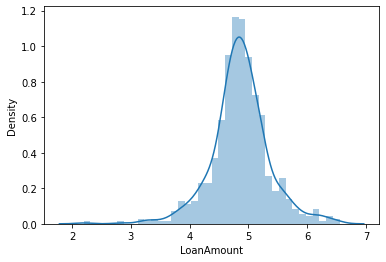

In [23]:
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

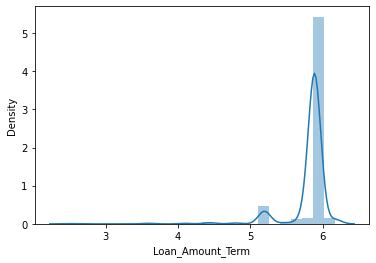

In [24]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term"])

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y


In [26]:
df = df.drop(columns='Loan_ID', axis=1)

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y


# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.0,4.986426,5.886104,1.0,2,1
1,1,1,1,0,0,8.430109,1508.0,4.852030,5.886104,1.0,0,0
2,1,1,0,0,1,8.006368,0.0,4.189655,5.886104,1.0,2,1
3,1,1,0,1,0,7.856707,2358.0,4.787492,5.886104,1.0,2,1
4,1,0,0,0,0,8.699515,0.0,4.948760,5.886104,1.0,2,1


## Train-Test Split

In [30]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# classify functionfrom sklearn.model_selection import train_test_split
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    print(x_train.shape,x_test.shape)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

(491, 11) (123, 11)
Accuracy is 78.86178861788618


In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

(491, 11) (123, 11)
Accuracy is 70.73170731707317


In [35]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

(491, 11) (123, 11)
Accuracy is 76.42276422764228


In [36]:
model = ExtraTreesClassifier()
classify(model, X, y)

(491, 11) (123, 11)
Accuracy is 76.42276422764228


In [37]:
pickle.dump(model, open('model.pkl','wb'))